In [ ]:
#import pandas library
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


# Load the marketing campaign dataset into dataframe
df = pd.read_csv('/content/drive/MyDrive/Marketing Campaign data.csv')

# Display basic summary
df_info = df.info()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   CUST_ID                  1500 non-null   int64 
 1   CUST_GENDER              1500 non-null   object
 2   AGE                      1500 non-null   int64 
 3   CUST_MARITAL_STATUS      1500 non-null   object
 4   COUNTRY_NAME             1500 non-null   object
 5   CUST_INCOME_LEVEL        1500 non-null   object
 6   EDUCATION                1500 non-null   object
 7   OCCUPATION               1500 non-null   object
 8   HOUSEHOLD_SIZE           1500 non-null   object
 9   YRS_RESIDENCE            1500 non-null   int64 
 10  AFFINITY_CARD            1500 non-null   int64 
 11  BULK_PACK_DISKETTES      1500 non-null   int64 
 12  FLAT_PANEL_MONITOR       1500 non-null   int64 
 13  HOME_THEATER_PACKAGE     1500 non-null   int64 
 14  BOOKKEEPING_APPLICATION  1500 non-null  

In [ ]:
#display first five rows
df.head()



,CUST_ID,CUST_GENDER,AGE,CUST_MARITAL_STATUS,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,OCCUPATION,HOUSEHOLD_SIZE,YRS_RESIDENCE,AFFINITY_CARD,BULK_PACK_DISKETTES,FLAT_PANEL_MONITOR,HOME_THEATER_PACKAGE,BOOKKEEPING_APPLICATION,PRINTER_SUPPLIES,Y_BOX_GAMES,OS_DOC_SET_KANJI,COMMENTS
0,101501,F,41,NeverM,United States of America,"J: 190,000 - 249,999",Masters,Prof.,2,4,0,1,1,1,1,1,0,0,Shopping at your store is a hassle. I rarely s...
1,101502,M,27,NeverM,United States of America,"I: 170,000 - 189,999",Bach.,Sales,2,3,0,1,1,0,1,1,1,0,Affinity card is great. I think it is a hassle...
2,101503,F,20,NeverM,United States of America,"H: 150,000 - 169,999",HS-grad,Cleric.,2,2,0,1,0,0,1,1,1,0,"I purchased a new computer recently, but the m..."
3,101504,M,45,Married,United States of America,"B: 30,000 - 49,999",Bach.,Exec.,3,5,1,0,0,1,1,1,0,0,Affinity card is great. I think it is a hassle...
4,101505,M,34,NeverM,United States of America,"K: 250,000 - 299,999",Masters,Sales,9+,5,1,1,1,0,1,1,0,0,Why didn't you start a program like this befor...


1. Data Understanding


In [ ]:
#create metatable
from tabulate import tabulate

#excluding comments

df = df.drop(columns=['COMMENTS'])

# Re-separate numeric and nominal columns
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
nominal_cols = df.select_dtypes(include=['object']).columns.tolist()

# Build updated metadata
metadata = []

for col in df.columns:
    col_data = df[col]
    is_numeric = pd.api.types.is_numeric_dtype(col_data)

    col_info = {
        "Attribute": col,
        "Description": "Numeric Variable" if is_numeric else "Nominal",
        "Max": col_data.max() if pd.api.types.is_numeric_dtype(col_data) else None,
        "Min": col_data.min() if pd.api.types.is_numeric_dtype(col_data) else None,
        "Mean": col_data.mean() if pd.api.types.is_numeric_dtype(col_data) else None,
        "Std. Deviation": col_data.std() if pd.api.types.is_numeric_dtype(col_data) else None,
        "Mode": col_data.mode().iloc[0] if not is_numeric and not col_data.mode().empty else None,
        "Type": "Numeric" if pd.api.types.is_numeric_dtype(col_data) else "Nominal"
    }

    metadata.append(col_info)

# Print the metadata as a table
print(" The required metadata table is")
print(tabulate(metadata, headers="keys", tablefmt="pipe"))


 The required metadata table is
| Attribute               | Description      |    Max |    Min |          Mean |   Std. Deviation | Mode                     | Type    |
|:------------------------|:-----------------|-------:|-------:|--------------:|-----------------:|:-------------------------|:--------|
| CUST_ID                 | Numeric Variable | 103000 | 101501 | 102250        |      433.157     |                          | Numeric |
| CUST_GENDER             | Nominal          |        |        |               |                  | M                        | Nominal |
| AGE                     | Numeric Variable |     90 |     17 |     38.892    |       13.6364    |                          | Numeric |
| CUST_MARITAL_STATUS     | Nominal          |        |        |               |                  | Married                  | Nominal |
| COUNTRY_NAME            | Nominal          |        |        |               |                  | United States of America | Nominal |
| CUST_IN

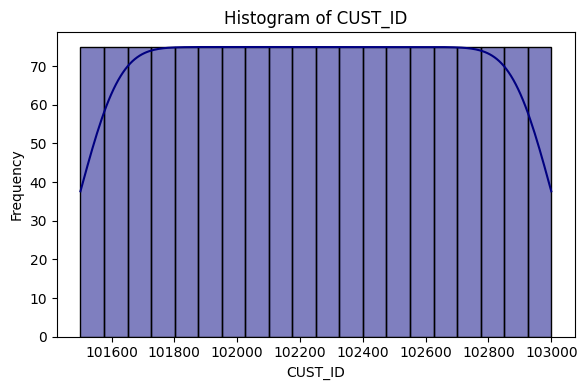

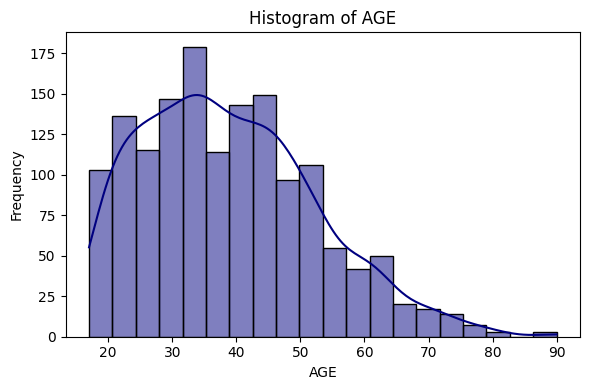

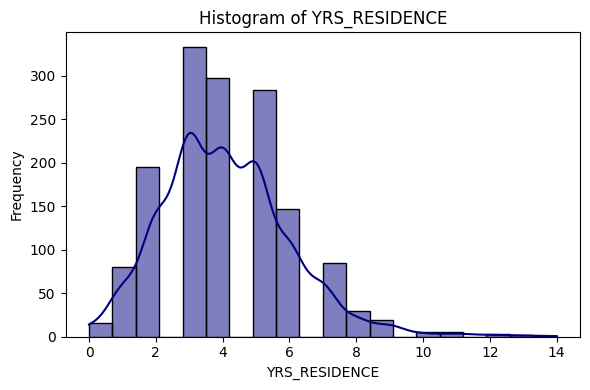

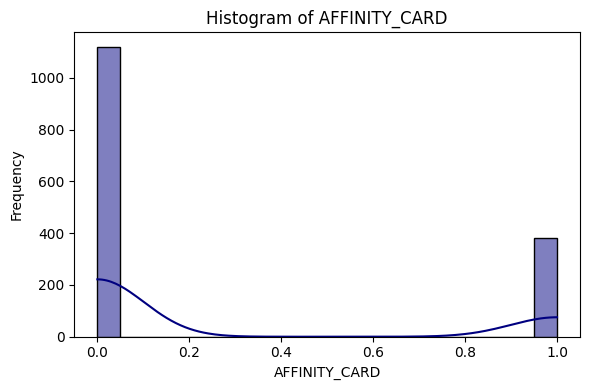

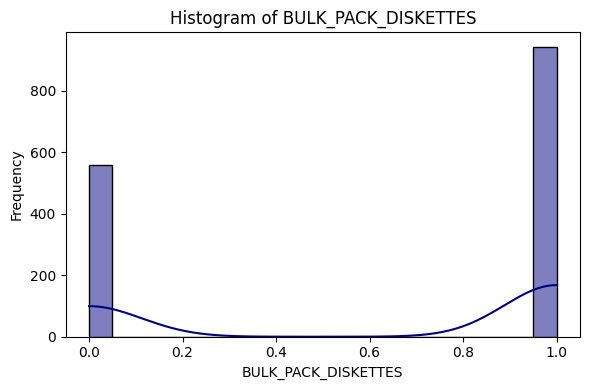

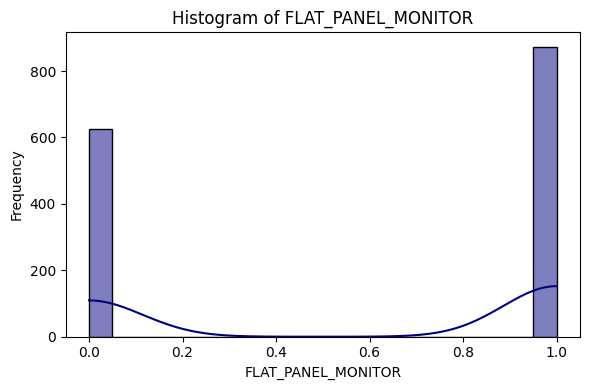

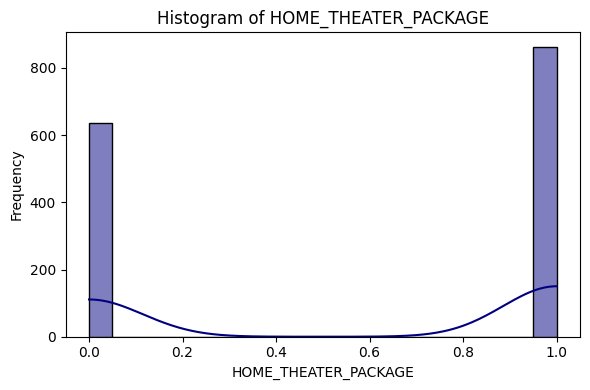

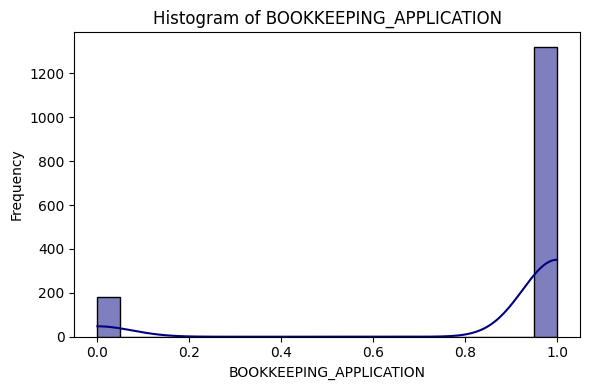

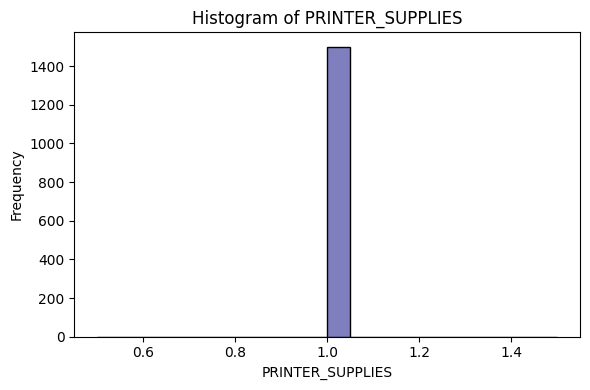

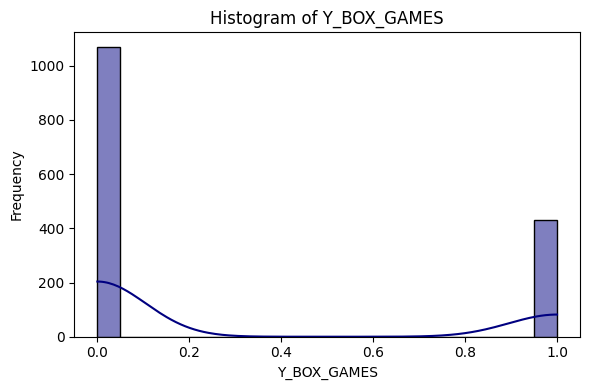

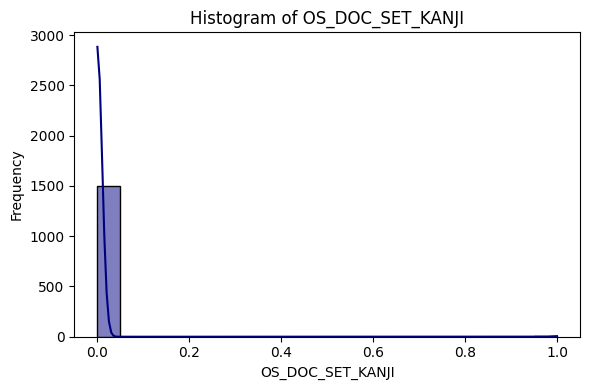

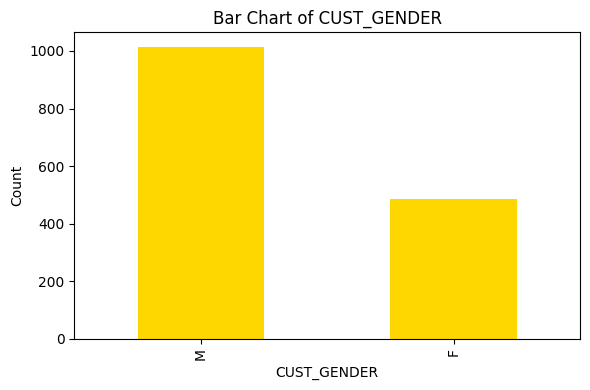

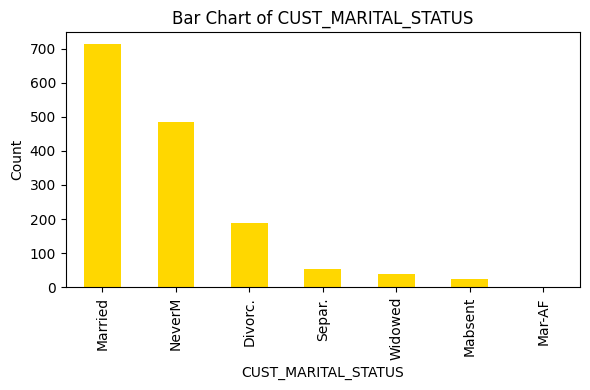

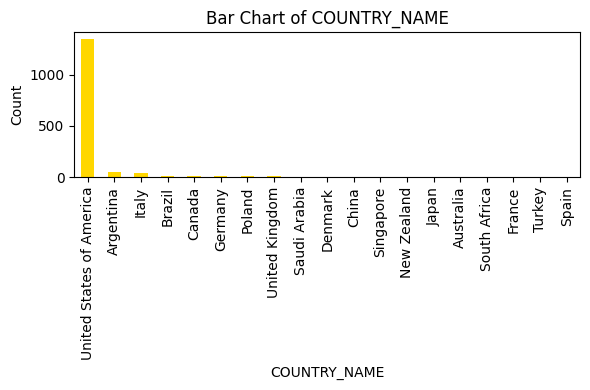

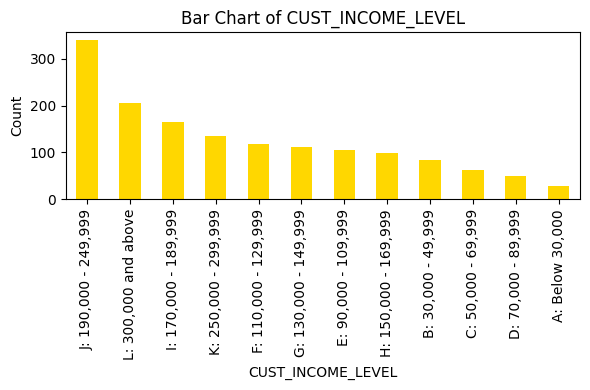

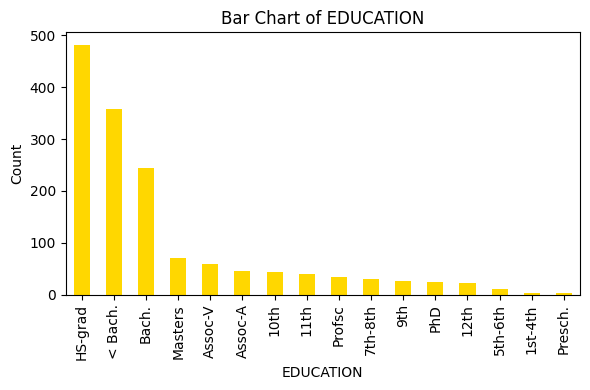

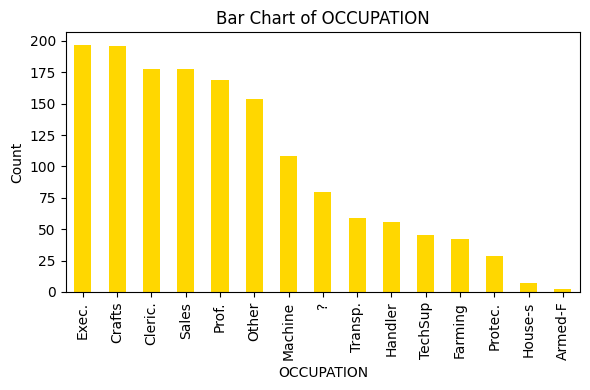

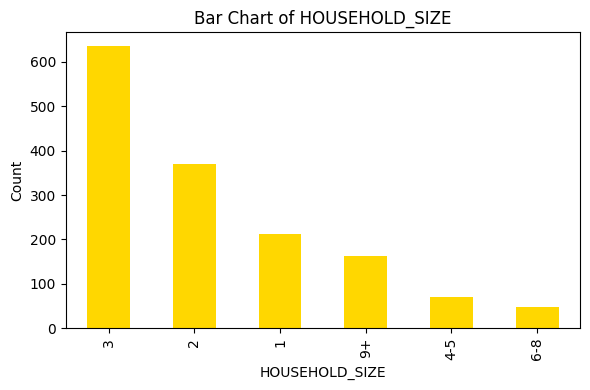

In [ ]:
#create histrogram for numeric data and mode and barchart for nominal data
#import the matplot and seaborn library

import matplotlib.pyplot as plt
import seaborn as sns

#plot histgram for thr numeric data
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True, bins=20, color='navy')
    plt.title(f'Histogram of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

#plot bar charts for categorical variables
for col in nominal_cols:
    plt.figure(figsize=(6, 4))
    df[col].value_counts().plot(kind='bar', color='gold')
    plt.title(f'Bar Chart of {col}')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.tight_layout()
    plt.show()



In [ ]:
#describe missing, null,blank,unknow or error data

#checking missing values
df.isnull().sum()

#fill the null values
df.fillna("Null", inplace=True)

#check the dataframe

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   CUST_ID                  1500 non-null   int64 
 1   CUST_GENDER              1500 non-null   object
 2   AGE                      1500 non-null   int64 
 3   CUST_MARITAL_STATUS      1500 non-null   object
 4   COUNTRY_NAME             1500 non-null   object
 5   CUST_INCOME_LEVEL        1500 non-null   object
 6   EDUCATION                1500 non-null   object
 7   OCCUPATION               1500 non-null   object
 8   HOUSEHOLD_SIZE           1500 non-null   object
 9   YRS_RESIDENCE            1500 non-null   int64 
 10  AFFINITY_CARD            1500 non-null   int64 
 11  BULK_PACK_DISKETTES      1500 non-null   int64 
 12  FLAT_PANEL_MONITOR       1500 non-null   int64 
 13  HOME_THEATER_PACKAGE     1500 non-null   int64 
 14  BOOKKEEPING_APPLICATION  1500 non-null  

2. Data preparation


In [ ]:
#assume target variable

target_var = "AFFINITY CARD"

#drop variables with have no interference with target

drop_variables = df.drop(columns=['CUST_ID'])

drop_variables

#keep comments for further process
comments = df['COMMENTS'].copy()

#view remaining columns

print("Remaining columns:", drop_variables.columns)

Remaining columns: Index(['CUST_GENDER', 'AGE', 'CUST_MARITAL_STATUS', 'COUNTRY_NAME',
       'CUST_INCOME_LEVEL', 'EDUCATION', 'OCCUPATION', 'HOUSEHOLD_SIZE',
       'YRS_RESIDENCE', 'AFFINITY_CARD', 'BULK_PACK_DISKETTES',
       'FLAT_PANEL_MONITOR', 'HOME_THEATER_PACKAGE', 'BOOKKEEPING_APPLICATION',
       'PRINTER_SUPPLIES', 'Y_BOX_GAMES', 'OS_DOC_SET_KANJI', 'COMMENTS'],
      dtype='object')


In [ ]:
#cleaning data
df.drop_duplicates(inplace=True) #remove duplicates

df.isnull().sum() #handle missing data

#fill the missing data in a comments

df['COMMENTS'] = df['COMMENTS'].fillna("No comment")
#checking the comments column again
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   CUST_ID                  1500 non-null   int64 
 1   CUST_GENDER              1500 non-null   object
 2   AGE                      1500 non-null   int64 
 3   CUST_MARITAL_STATUS      1500 non-null   object
 4   COUNTRY_NAME             1500 non-null   object
 5   CUST_INCOME_LEVEL        1500 non-null   object
 6   EDUCATION                1500 non-null   object
 7   OCCUPATION               1500 non-null   object
 8   HOUSEHOLD_SIZE           1500 non-null   object
 9   YRS_RESIDENCE            1500 non-null   int64 
 10  AFFINITY_CARD            1500 non-null   int64 
 11  BULK_PACK_DISKETTES      1500 non-null   int64 
 12  FLAT_PANEL_MONITOR       1500 non-null   int64 
 13  HOME_THEATER_PACKAGE     1500 non-null   int64 
 14  BOOKKEEPING_APPLICATION  1500 non-null  

In [ ]:

# Define missing data
missing_values = ["", " ", "NA", "N/A", "null", "Null", "NULL", "?", "unknown", "Unknown", "UNKNOWN"]


# Build missing value report
missing_data_report = []

for col in df.columns:
    null_count = df[col].isnull().sum()

    missing_data_report.append({
        "Attribute": col,
        "Missing Values": null_count
    })

# Convert to DataFrame
missing_report_df = pd.DataFrame(missing_data_report)

# Sorting
missing_report_df = missing_report_df.sort_values(by="Missing Values", ascending=False)

# Show result
print(missing_report_df)


                  Attribute  Missing Values
7                OCCUPATION              80
18                 COMMENTS              73
0                   CUST_ID               0
2                       AGE               0
1               CUST_GENDER               0
5         CUST_INCOME_LEVEL               0
3       CUST_MARITAL_STATUS               0
6                 EDUCATION               0
8            HOUSEHOLD_SIZE               0
9             YRS_RESIDENCE               0
4              COUNTRY_NAME               0
10            AFFINITY_CARD               0
11      BULK_PACK_DISKETTES               0
13     HOME_THEATER_PACKAGE               0
12       FLAT_PANEL_MONITOR               0
14  BOOKKEEPING_APPLICATION               0
15         PRINTER_SUPPLIES               0
16              Y_BOX_GAMES               0
17         OS_DOC_SET_KANJI               0


In [ ]:
#replacing the values in MARITAL_STATUS
df['CUST_MARITAL_STATUS'] = df['CUST_MARITAL_STATUS'].replace({
    'NeverM': 'NeverMarried',
    'Divorc.': 'Divorced',
    'Mar-AF': 'Married Armed Force',
    'NeverM': 'Never Married',
    'Separ.': 'Separated',
    'Mabsent': 'Married Absent'
})

df['CUST_MARITAL_STATUS'].unique()

array(['Never Married', 'Married', 'Divorced', 'Married Absent',
       'Separated', 'Widowed', 'Married Armed Force'], dtype=object)

In [ ]:
#replace the values in EDUCATION

df['EDUCATION'] = df['EDUCATION'].replace({
    'Bach.': 'Bachelor',
    'HS-grad': 'High School graduate',
    'Profsc': 'Professor',
    '< Bach.': '< Bachelor',
    'Masters': 'Master',
    '12th': 'High School',
    'Presch.': 'Preschool'

})
#check the unique values
df['EDUCATION'].unique()

array(['Master', 'Bachelor', 'High School graduate', '< Bachelor',
       'Professor', '11th', '5th-6th', 'Assoc-A', '10th', 'Assoc-V',
       '7th-8th', 'PhD', '9th', '1st-4th', 'High School', 'Preschool'],
      dtype=object)

In [ ]:
#replace the values in occupation
df['OCCUPATION']= df['OCCUPATION'].replace({
    'Prof.': 'Professor',
    'Armed-F': 'Armed Forces',
    'Cleric.':'Clerical',
    'Exec.': 'Executive',
    'House-s':'House Servant',
    'Protec.':'Proctective Service',
    'Transp.': 'Transportation' ,
    'TechSup': 'Tech Support',
    '?': 'Nan'

})

#check the values

df['OCCUPATION'].unique()

array(['Professor', 'Sales', 'Clerical', 'Executive', 'Other', 'Farming',
       'Transportation', 'Machine', 'Crafts', 'Handler', 'Nan',
       'Proctective Service', 'Tech Support', 'House Servant',
       'Armed Forces'], dtype=object)

In [ ]:
#convert CUST_GENDER into binary F - 0, M -1
#before conversion
df['CUST_GENDER'].head(10) #display only 10 first rows

,CUST_GENDER
0,F
1,M
2,F
3,M
4,M
5,M
6,M
7,M
8,M
9,M


In [ ]:
#convert into binary
df['CUST_GENDER'] = df['CUST_GENDER'].map({'F': 0, 'M': 1})

#after conversion
df['CUST_GENDER'].head(10) #display only first 10 rows

,CUST_GENDER
0,0
1,1
2,0
3,1
4,1
5,1
6,1
7,1
8,1
9,1


In [ ]:
#convert country name into ordinal number based on their frequency in ascending order

#before conversion
df['COUNTRY_NAME'].head(10) #display only 10 first rows

,COUNTRY_NAME
0,United States of America
1,United States of America
2,United States of America
3,United States of America
4,United States of America
5,United States of America
6,United States of America
7,United States of America
8,Brazil
9,United States of America


In [ ]:
#get frequency count of each country
country_counts = df['COUNTRY_NAME'].value_counts()

#sort by ascending frequency and assign ordinal codes
country_rank = country_counts.sort_values().reset_index()
country_rank.columns = ['COUNTRY_NAME', 'COUNT']
country_rank['ORDINAL'] = range(1, len(country_rank) + 1)

#create a mapping dictionary
country_to_ordinal = dict(zip(country_rank['COUNTRY_NAME'], country_rank['ORDINAL']))

#mapping to some ordinal values
df['COUNTRY_ORDINAL'] = df['COUNTRY_NAME'].map(country_to_ordinal)

#display only duplicates country with ordinal value in ascending order
print(df[['COUNTRY_NAME', 'COUNTRY_ORDINAL']].drop_duplicates().sort_values(by='COUNTRY_ORDINAL'))


                  COUNTRY_NAME  COUNTRY_ORDINAL
743               South Africa                1
1496                     Spain                2
1432                    Turkey                3
994                     France                4
74                   Australia                5
123                      Japan                6
50                 New Zealand                7
377                  Singapore                8
138                      China                9
116                    Denmark               10
112               Saudi Arabia               11
255             United Kingdom               12
82                      Poland               13
37                     Germany               14
237                     Canada               15
8                       Brazil               16
38                       Italy               17
17                   Argentina               18
0     United States of America               19


In [ ]:
#convert CUST_INCOME_LEVEL into 4 ordinal levels:1–low,2-middle,3-high,4-very hign
#before conversion

df['CUST_INCOME_LEVEL'].head(10) #display only 10 first rows

,CUST_INCOME_LEVEL
0,"J: 190,000 - 249,999"
1,"I: 170,000 - 189,999"
2,"H: 150,000 - 169,999"
3,"B: 30,000 - 49,999"
4,"K: 250,000 - 299,999"
5,"K: 250,000 - 299,999"
6,"J: 190,000 - 249,999"
7,"K: 250,000 - 299,999"
8,"K: 250,000 - 299,999"
9,"L: 300,000 and above"


In [ ]:
#extract first letter from income level (A, B, ..., L)
df['income_code'] = df['CUST_INCOME_LEVEL'].str.extract(r'^([A-L])')

#create mapping based on code groupings
income_level_map = {
    'A': 1, 'B': 1, 'C': 1,          # Low Income
    'D': 2, 'E': 2, 'F': 2, 'G': 2,  # Middle Income
    'H': 3, 'I': 3,                  # High Income
    'J': 4, 'K': 4, 'L': 4           # Very High Income
}

#map to ordinal level
df['INCOME_ORDINAL'] = df['income_code'].map(income_level_map)

#display result
print(df[['CUST_INCOME_LEVEL', 'INCOME_ORDINAL']].head(20)) #print only first 20 rows


       CUST_INCOME_LEVEL  INCOME_ORDINAL
0   J: 190,000 - 249,999               4
1   I: 170,000 - 189,999               3
2   H: 150,000 - 169,999               3
3     B: 30,000 - 49,999               1
4   K: 250,000 - 299,999               4
5   K: 250,000 - 299,999               4
6   J: 190,000 - 249,999               4
7   K: 250,000 - 299,999               4
8   K: 250,000 - 299,999               4
9   L: 300,000 and above               4
10  H: 150,000 - 169,999               3
11  I: 170,000 - 189,999               3
12  J: 190,000 - 249,999               4
13  L: 300,000 and above               4
14  J: 190,000 - 249,999               4
15  G: 130,000 - 149,999               2
16  I: 170,000 - 189,999               3
17  L: 300,000 and above               4
18  J: 190,000 - 249,999               4
19    B: 30,000 - 49,999               1


In [ ]:
#convert	EDUCATION into ordinal numbers based on USA education level in descending order.
#before conversion
df['EDUCATION'].head(10) #display only 10 first rows

,EDUCATION
0,Masters
1,Bach.
2,HS-grad
3,Bach.
4,Masters
5,HS-grad
6,< Bach.
7,HS-grad
8,Bach.
9,Bach.


In [ ]:
#assigning ordinal values
education_order = {

    "Professor" : 9,
    "PhD": 8,
    "Master": 7,
    "Bachelor": 6,
    "< Bachelor": 5,
    "Assoc-V": 4,
    "Assoc-A": 3,
    "High School graduate": 2,
    "High School": 2,
    "11th":1,
    "10th":1,
    "9th":1,
    "7th-8th":1,
    "5th-6th":1,
    "1st-4th":1,
    "Preschool":0,
    "Unknown": None

}

df['ORDINAL_DATA'] = df['EDUCATION'].map(education_order)
print(df[['EDUCATION', 'ORDINAL_DATA']].drop_duplicates().sort_values(by='ORDINAL_DATA',ascending=False))



    EDUCATION  ORDINAL_DATA
50        PhD           8.0
40    Assoc-V           4.0
33    Assoc-A           3.0
14       11th           1.0
17    5th-6th           1.0
35       10th           1.0
49    7th-8th           1.0
57        9th           1.0
82    1st-4th           1.0
0     Masters           NaN
1       Bach.           NaN
2     HS-grad           NaN
6     < Bach.           NaN
11     Profsc           NaN
122      12th           NaN
519   Presch.           NaN


In [ ]:
#convert the OCCUPATION into a series of binary columns using one hot encoding transforms

#before conversion

df['OCCUPATION'].head(10) #display only 15 first rows

,OCCUPATION
0,Prof.
1,Sales
2,Cleric.
3,Exec.
4,Sales
5,Other
6,Sales
7,Sales
8,Other
9,Sales


In [ ]:
# One-hot encode the 'OCCUPATION' column
get_dummies = pd.get_dummies(df['OCCUPATION'], prefix='OCCUPATION')
df = pd.concat([df, get_dummies], axis=1)
print(get_dummies.head(10))



   OCCUPATION_?  OCCUPATION_Armed-F  OCCUPATION_Cleric.  OCCUPATION_Crafts  \
0         False               False               False              False   
1         False               False               False              False   
2         False               False                True              False   
3         False               False               False              False   
4         False               False               False              False   
5         False               False               False              False   
6         False               False               False              False   
7         False               False               False              False   
8         False               False               False              False   
9         False               False               False              False   

   OCCUPATION_Exec.  OCCUPATION_Farming  OCCUPATION_Handler  \
0             False               False               False   
1             F

In [ ]:
#neglecting the all occupation columns
columns_to_keep = [
    'CUST_GENDER',
    'CUST_MARITAL_STATUS',
    'COUNTRY_NAME',
    'CUST_INCOME_LEVEL',
    'EDUCATION',
    'HOUSEHOLD_SIZE',
    'COMMENTS'
]

df = df[columns_to_keep]
df

,CUST_GENDER,CUST_MARITAL_STATUS,COUNTRY_NAME,CUST_INCOME_LEVEL,EDUCATION,HOUSEHOLD_SIZE,COMMENTS
0,F,NeverM,United States of America,"J: 190,000 - 249,999",Masters,2,Shopping at your store is a hassle. I rarely s...
1,M,NeverM,United States of America,"I: 170,000 - 189,999",Bach.,2,Affinity card is great. I think it is a hassle...
2,F,NeverM,United States of America,"H: 150,000 - 169,999",HS-grad,2,"I purchased a new computer recently, but the m..."
3,M,Married,United States of America,"B: 30,000 - 49,999",Bach.,3,Affinity card is great. I think it is a hassle...
4,M,NeverM,United States of America,"K: 250,000 - 299,999",Masters,9+,Why didn't you start a program like this befor...
...,...,...,...,...,...,...,...
1495,M,NeverM,United States of America,"C: 50,000 - 69,999",10th,1,I purchased a new computer from your store rec...
1496,M,Married,Spain,"L: 300,000 and above",Bach.,3,The new affinity card is great. Thank you. I d...
1497,M,Married,United States of America,"J: 190,000 - 249,999",HS-grad,3,I wanted to write you to let you know that I'v...
1498,M,Married,United States of America,"C: 50,000 - 69,999",HS-grad,3,My sister told me about your store and I was i...


**3. Data Analysis**

In [ ]:
#analyze comments using sentiment analysis

#using Textblob python library for sentiment analysis

from textblob import TextBlob
all_comments = df['COMMENTS']

# Extract all comments (convert to string in case of NaN or non-text)
all_comments = df['COMMENTS'].astype(str)

# Create empty lists
sentiment_labels = []

# Analyze each comment
for x in all_comments:
    blob = TextBlob(x)
    polarity = blob.sentiment.polarity


    # Sentiment label
    if polarity > 0.1:
        sentiment = 1
    elif polarity < -0.1:
        sentiment = -1
    else:
        sentiment = 0

    # Append to lists

    sentiment_labels.append(sentiment)

# Add results to DataFrame

df['SENTIMENT'] = sentiment_labels

# Show output for first 20 comments
print(df[['COMMENTS','SENTIMENT']].head(20))




                                             COMMENTS  SENTIMENT
0   Shopping at your store is a hassle. I rarely s...          0
1   Affinity card is great. I think it is a hassle...          1
2   I purchased a new computer recently, but the m...          0
3   Affinity card is great. I think it is a hassle...          1
4   Why didn't you start a program like this befor...          0
5   Forget it. I 'm not giving you all my personal...          0
6   It is a good way to attract new shoppers. Afte...          1
7   I shop your store a lot.  I love your weekly s...          1
8   Affinity card makese sense only for bulk purch...          0
9   Could you send an Affinity Card to my mother i...          0
10  Shopping at your store is a hassle. I rarely s...          0
11  The new affinity card is great. Thank you. I d...          1
12  Thanks but even with your discounts, your prod...         -1
13  Affinity card is great. I think it is a hassle...          1
14  I purchased the new m

Corelation Analysis

In [ ]:
#check remaining column
non_numeric = df.select_dtypes(exclude=['int64', 'float64']).columns.tolist()
non_numeric

#droping column occupation and comments
df=df.drop(columns=['COMMENTS'])


In [ ]:
#check unique value of remaining non numeric columns
print(df['CUST_MARITAL_STATUS'].unique())
print(df['HOUSEHOLD_SIZE'].unique())

['Never Married' 'Married' 'Divorced' 'Married Absent' 'Separated'
 'Widowed' 'Married Armed Force']
['2' '3' '9+' '6-8' '1' '4-5']


In [ ]:
# performing one-hot encode CUST_MARITAL_STATUS
df = pd.get_dummies(df, columns=['CUST_MARITAL_STATUS'], prefix='MARITAL',dtype=int)
df.columns

Index(['CUST_GENDER', 'COUNTRY_NAME', 'CUST_INCOME_LEVEL', 'EDUCATION',
       'HOUSEHOLD_SIZE', 'COMMENTS', 'SENTIMENT', 'MARITAL_Divorced',
       'MARITAL_Married', 'MARITAL_Married Absent',
       'MARITAL_Married Armed Force', 'MARITAL_Never Married',
       'MARITAL_Separated', 'MARITAL_Widowed'],
      dtype='object')

In [ ]:
# mapping to average numeric values

household_size_mapping = {
    '1': 1,
    '2': 2,
    '3': 3,
    '4-5': 4.5,
    '6-8': 7,
    '9+': 9
}

df['HOUSEHOLD_SIZE'] = df['HOUSEHOLD_SIZE'].map(household_size_mapping)
df['HOUSEHOLD_SIZE'].unique()

array([2. , 3. , 9. , 7. , 1. , 4.5])

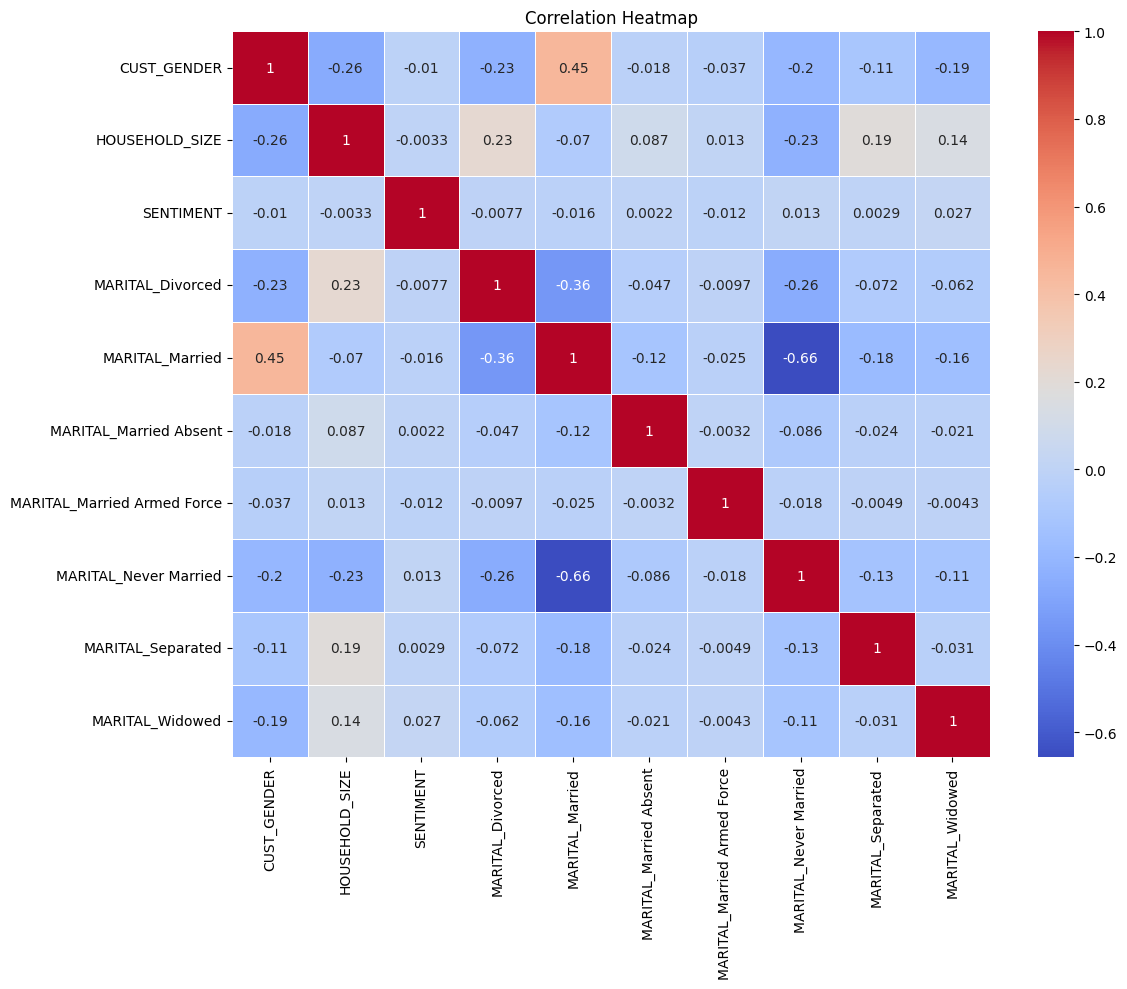

In [ ]:
# corelation heatmap between all features

corr_matrix=df.select_dtypes(include=['number']).corr()

plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True,cmap='coolwarm',linewidths=0.5)
plt.title('Correlation Heatmap')
plt.tight_layout()  # Prevent label cutoff
plt.show()

4. Data Exploration



 All Columns:
['CUST_ID', 'CUST_GENDER', 'AGE', 'CUST_MARITAL_STATUS', 'COUNTRY_NAME', 'CUST_INCOME_LEVEL', 'EDUCATION', 'OCCUPATION', 'HOUSEHOLD_SIZE', 'YRS_RESIDENCE', 'AFFINITY_CARD', 'BULK_PACK_DISKETTES', 'FLAT_PANEL_MONITOR', 'HOME_THEATER_PACKAGE', 'BOOKKEEPING_APPLICATION', 'PRINTER_SUPPLIES', 'Y_BOX_GAMES', 'OS_DOC_SET_KANJI', 'income_code', 'INCOME_ORDINAL', 'ORDINAL_DATA']

 Enter the target column::CUST_MARITAL_STATUS
['CUST_ID', 'AGE', 'YRS_RESIDENCE', 'AFFINITY_CARD', 'BULK_PACK_DISKETTES', 'FLAT_PANEL_MONITOR', 'HOME_THEATER_PACKAGE', 'BOOKKEEPING_APPLICATION', 'PRINTER_SUPPLIES', 'Y_BOX_GAMES', 'OS_DOC_SET_KANJI', 'INCOME_ORDINAL', 'ORDINAL_DATA']

Available numerical columns:
 CUST_ID
 AGE
 YRS_RESIDENCE
 AFFINITY_CARD
 BULK_PACK_DISKETTES
 FLAT_PANEL_MONITOR
 HOME_THEATER_PACKAGE
 BOOKKEEPING_APPLICATION
 PRINTER_SUPPLIES
 Y_BOX_GAMES
 OS_DOC_SET_KANJI
 INCOME_ORDINAL
 ORDINAL_DATA

Enter column for X-axis (or type 'exit' to quit): AGE
Enter column for Y-axis: CUST_I

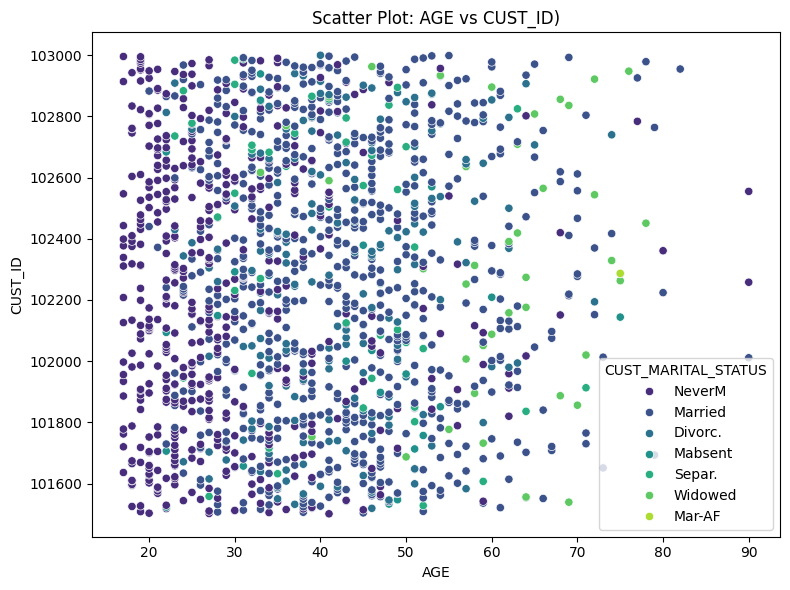


Available numerical columns:
 CUST_ID
 AGE
 YRS_RESIDENCE
 AFFINITY_CARD
 BULK_PACK_DISKETTES
 FLAT_PANEL_MONITOR
 HOME_THEATER_PACKAGE
 BOOKKEEPING_APPLICATION
 PRINTER_SUPPLIES
 Y_BOX_GAMES
 OS_DOC_SET_KANJI
 INCOME_ORDINAL
 ORDINAL_DATA


KeyboardInterrupt: Interrupted by user

In [ ]:
#select any two numerical value from the data at runtime

#importing library
import matplotlib.pyplot as plt  # library for creating static, animated, and interactive visualizations
import seaborn as sns   # ython data visualization library based on matplotlib.

print("\n All Columns:")
print(df.columns.to_list())

avaliable_column = input("\n Enter the target column::")
if avaliable_column not in df.columns:
  print(f"Error: '{avaliable_column}' column not found.")
  exit()

#selecting only numeric datatypes
num_columns = df.select_dtypes(include='number').columns.tolist()
print(num_columns)
if avaliable_column in num_columns:
    num_columns.remove(avaliable_column)

if len(num_columns) < 2:
    print("Not enough numerical columns to generate scatter plots.")
    exit()

while True:
    print("\nAvailable numerical columns:")
    for col in num_columns:
        print(f" {col}")

    x_axis = input("\nEnter column for X-axis (or type 'exit' to quit): ")
    if x_axis.lower() == 'exit':
        print("Exiting.")
        break

    y_axis = input("Enter column for Y-axis: ")

    if x_axis not in num_columns or y_axis not in num_columns:
        print("Invalid column selection. Please select from the list.")
        continue

    # Generate the scatter plot
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=x_axis, y=y_axis, hue=avaliable_column, palette='viridis')
    plt.title(f'Scatter Plot: {x_axis} vs {y_axis})')
    plt.xlabel(x_axis)
    plt.ylabel(y_axis)
    plt.tight_layout()
    plt.show()


5. Data Mining

In [ ]:
#for logistic regression ML model

#importing important libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Split the data
train_df = df.iloc[:-100].copy()
test_df = df.iloc[-100:].copy()

# Define target and features
target = "AFFINITY_CARD"
features = [col for col in df.columns if col not in ["CUST_ID", "COMMENTS", "AFFINITY_CARD"]]

# Separate features by type
numeric_features = train_df[features].select_dtypes(include=["int64", "float64"]).columns.tolist()
categorical_features = train_df[features].select_dtypes(include=["object"]).columns.tolist()

# Preprocessing: impute and encode
preprocessor = ColumnTransformer(
    transformers=[
        ("num", SimpleImputer(strategy="mean"), numeric_features),
        ("cat", make_pipeline(SimpleImputer(strategy="most_frequent"), OneHotEncoder(handle_unknown="ignore")), categorical_features)
    ]
)

# Preprocess features
X_train = preprocessor.fit_transform(train_df[features])
y_train = train_df[target]

# Select top 10 features
selector = SelectKBest(score_func=f_classif, k=10)
X_train_selected = selector.fit_transform(X_train, y_train)

# Fit logistic regression model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_selected, y_train)

# Get intercept and coefficients
intercept = model.intercept_[0]
coefficients = model.coef_[0]

# output

intercept, coefficients

#intercept : -3.23
#coefficients for 10 top features : [ 0.18360261, -0.01607235,  0.23988887,  0.50012654,
#-0.60821382,2.27478769, -0.00939335,  0.89264465, -0.49481565, -0.25252877]

/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [0] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.11/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


(np.float64(-3.2306012645262063),
 array([ 0.18360261, -0.01607235,  0.23988887,  0.50012654, -0.60821382,
         2.27478769, -0.00939335,  0.89264465, -0.49481565, -0.25252877]))

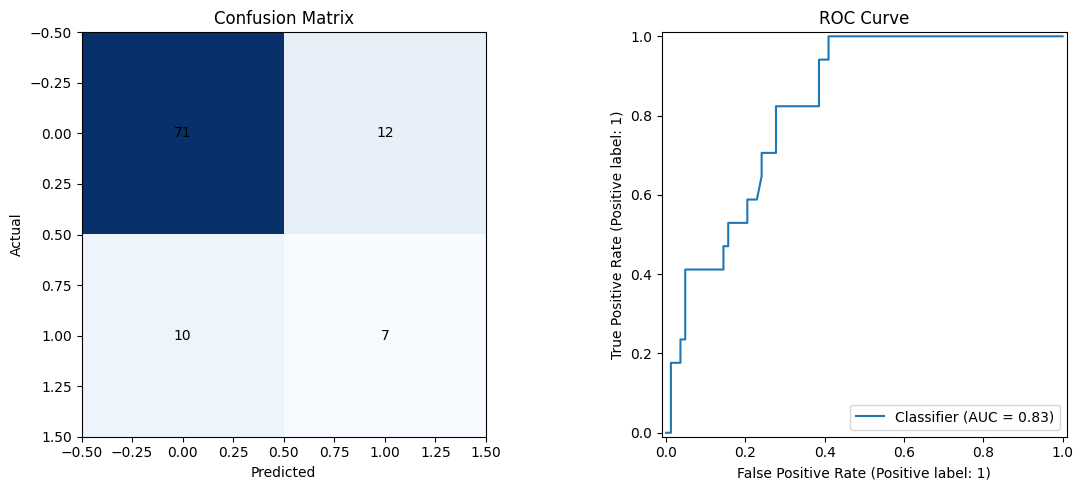

(0.78,
 {'0': {'precision': 0.8765432098765432,
   'recall': 0.8554216867469879,
   'f1-score': 0.8658536585365854,
   'support': 83.0},
  '1': {'precision': 0.3684210526315789,
   'recall': 0.4117647058823529,
   'f1-score': 0.3888888888888889,
   'support': 17.0},
  'accuracy': 0.78,
  'macro avg': {'precision': 0.622482131254061,
   'recall': 0.6335931963146704,
   'f1-score': 0.6273712737127372,
   'support': 100.0},
  'weighted avg': {'precision': 0.7901624431448993,
   'recall': 0.78,
   'f1-score': 0.784769647696477,
   'support': 100.0}})

In [ ]:
# testing the accuracy of the model using last 100 customer records


from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, RocCurveDisplay
import matplotlib.pyplot as plt

# Preprocess the test data using the same pipeline
X_test = preprocessor.transform(test_df[features])
y_test = test_df[target]

# Apply the same feature selector to test data
X_test_selected = selector.transform(X_test)

# Predict using the trained model
y_pred = model.predict(X_test_selected)
y_prob = model.predict_proba(X_test_selected)[:, 1]  # Probabilities for ROC

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred)

# Plot confusion matrix and ROC curve
fig, ax = plt.subplots(1, 2, figsize=(12, 5))

# Confusion Matrix
ax[0].imshow(conf_matrix, cmap='Blues')
ax[0].set_title("Confusion Matrix")
ax[0].set_xlabel("Predicted")
ax[0].set_ylabel("Actual")
for i in range(2):
    for j in range(2):
        ax[0].text(j, i, conf_matrix[i, j], ha="center", va="center", color="black")

# ROC Curve
RocCurveDisplay.from_predictions(y_test, y_prob, ax=ax[1])
ax[1].set_title("ROC Curve")

plt.tight_layout()
plt.show()

accuracy, report

#Output

# Accuracy = 78 percent

#ROC Curve shows the trade-off between true positive rate and false positive rate. A curve closer to the top-left indicates better performance.

In [ ]:
#Implement a predictive application based on the created logistic regression ML model.


import pandas as pd

print("Welcome to the predictive game!")

while True:
    choice = input("\nType '1' for keyboard input, '2' to load from file, or 'q' to quit: ").strip()

    if choice == 'q':
        print("user choosed to quit.")
        break

    elif choice == '1':
        try:
            gender = float(input("Gender (0 = Female, 1 = Male): "))
            age = float(input("Age: "))
            income = float(input("Income level (number): "))
            education = float(input("Education level (number): "))
            country = float(input("Country rank: "))
            marital = float(input("Marital status (number): "))
            household = float(input("Household size: "))
            occupation = float(input("Is the customer a professional? (0 = No, 1 = Yes): "))
            years_residence = float(input("Years at current residence: "))
            printer_supplies = float(input("Number of printer supplies purchased: "))
        except ValueError:
            print("invalid value")
            continue

        # Organizing  data for prediction
        data = pd.DataFrame([[gender, age, income, education, country,
                              marital, household, occupation, years_residence, printer_supplies]],
                            columns=feature_col)

        # Predict and display result
        prediction = logreg.predict(data)[0]
        if prediction == 1:
            print("Prediction: This customer has an affinity card.")
        else:
            print("Prediction: This customer does not have an affinity card.")

    elif choice == '2':

        try:
            data = pd.read_csv(input('/content/drive/MyDrive/Assignment/Marketing Campaign data.csv'))
            data = data[feature_col]  # Make sure only needed features are selected
            predictions = logreg.predict(data)

            # Display prediction for each record
            for i, pred in enumerate(predictions):
                status = "HAS an affinity card" if pred == 1 else "does NOT have an affinity card"
                print(f"Record {i+1}: Prediction - Customer likely {status}")
        except Exception as e:
            print(f"Oops! Couldn't load or predict from the file: {e}")

    else:
        print("That wasn't a valid option. Please enter 1, 2, or q.")



🎯 Welcome to the Customer Affinity Card Predictor!

Type '1' for manual input, '2' to load from CSV file, or 'q' to quit: 1
Gender (0 = Female, 1 = Male): 1
Age: 12
Income level (numeric): 22
Education level (numeric): 2
Country rank (numeric): 2
Marital status (numeric): 3
Household size: 2
Is the customer a professional? (0 = No, 1 = Yes): 1
Years at current residence: 1
Number of printer supplies purchased: 1


NameError: name 'feature_col' is not defined